# $Kumar Ashutosh$

## Prediction using Supervised ML

#### **Predict the percentage of a student based on the number of study hours. This is a simple linear regression task as it involves just 2 variables.**
<br>
<br>

- Dataset: http://bit.ly/w-data

### <center>**$Stick$ $till$ $the$ $end$ $for$ $the$ $surprise!$**

# Libraries

In [2]:
import numpy as np   # numerical module
import pandas as pd  # dataframe

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid') # setting the plot background
%matplotlib inline

# for the model
from sklearn.model_selection import train_test_split # for splitting the data in twain
from sklearn.linear_model import LinearRegression # for building the model

# check
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error # checking the output

# for a cleaner output
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [3]:
# url link to the data
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

# loading the dataframe
df = pd.read_csv(url)

# checking the column names, shape, dtypes and missing values
df.info()
# this will be done again to check all the above

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


$Features$:

  1. $Hours$: The total amount of time spent studying per day.

  2. $Scores$: The score secured by the student.

**$Observation$**:
- No null values in the dataset.
- both the features are numeric being float and integer.

# Exploratory Data Analysis

Trying to make sense of the data at hand, before dirtying them with it.

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Checking the shape of the data
df.shape

(25, 2)

**$Observation$**:
- 2 features
- 25 data points

In [5]:
# Checking the 5 point summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


**$Observation$**:
- The mean and median are pretty close for all the features.
- The data has minimal variablitlity.
- Current estimates suggest a normal distribution.
- Maximum marks secured is 95 in the test.
- Maximum hours studied in the day is 9.2 hours.
- 25% of the class secured below 30.

In [6]:
# Checking for missing values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

**$Observation$**:
- No missing values in both the features.

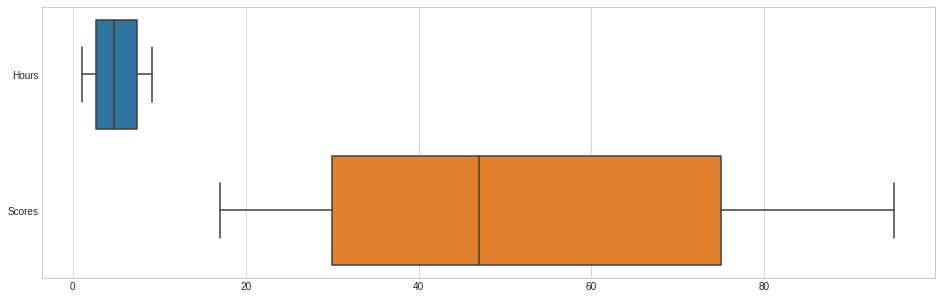

In [39]:
# checking for outliers
plt.figure(figsize=(16,5))
sns.boxplot(data=df,orient='h')
plt.show()

In [20]:
# checking the skew in the data
df.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

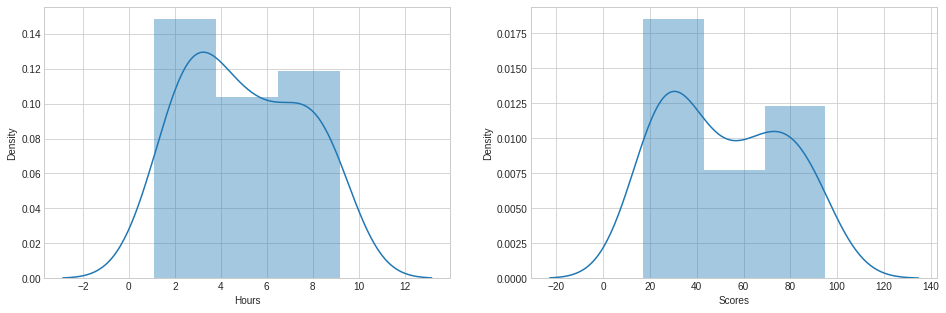

In [40]:
# checking the distribution
fig,ax = plt.subplots(1,2,figsize=(16,5))
sns.distplot(df['Hours'],ax=ax[0])
sns.distplot(df['Scores'],ax=ax[1])
fig.show()

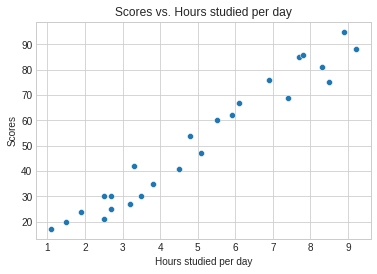

In [22]:
# plotting the data to get some insights
sns.scatterplot(x=df['Hours'],y=df['Scores'])
plt.xlabel('Hours studied per day')
plt.title('Scores vs. Hours studied per day')
plt.show()

In [21]:
# let's check the correlation between the 2 features
df['Hours'].corr(df['Scores'])

0.9761906560220887

**$Observations$**:
- No outliers.
- Slight right skew.
- Normal distribution.
- Both the features show a linear characteristic.
- Both the columns are highly correlated.

# Model

In [23]:
# splitting the data
x = df.iloc[:,:-1].values # feature
y = df.iloc[:,1].values   # target
# Scores was chosen as the target as based on the time invested...
# ...in studying seems to have a direct impact.


# train, test
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.1,random_state=42)
xtr.shape,xts.shape,ytr.shape,yts.shape

((22, 1), (3, 1), (22,), (3,))

In [24]:
# building the model
lr = LinearRegression()
lr.fit(xtr,ytr)

ypr = lr.predict(xts)

In [25]:
print(f'accuracy: {r2_score(y_true=yts,y_pred=ypr)}')
print(f'rmse: {np.sqrt(mean_squared_error(y_true=yts,y_pred=ypr))}')

accuracy: 0.974047128713709
rmse: 4.256184225081323


**$Observations$**:
- The model is 97% accurate with an rmse of 4.26.

In [29]:
# Checking the data points.
pd.DataFrame({'actual':yts,'predicted':map(round,ypr)})
# As the actual scores are all integers, it only made sense to make ...
# ... all the predicted into integers too.

,actual,predicted
0,81,84
1,30,27
2,21,27


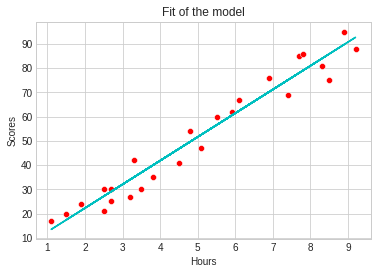

In [ ]:
# plotting the regression line and the data points
sns.scatterplot(data=df,x='Hours',y='Scores',color='r')
plt.plot(x,lr.intercept_+lr.coef_*x,color='c')
plt.title('Fit of the model')
plt.show()

#### $Q.$ What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
# predicting the score when studied for 9.5 hours

hour = [[9.25]]
score = lr.predict(hour)
print(f'By studying for {hour[0][0]} it is predicted that {round(score[0])} marks can be obtained.')

By studying for 9.25 it is predicted that 93 marks can be obtained.


# Model Evaluation

### Mean Absolute Error

In [ ]:
# checking the mean absolute error

print(f'Mean Absolute Error: {mean_absolute_error(y_true=yts,y_pred=ypr)}')

Mean Absolute Error: 3.9657593887812084


### Mean Squared Error

In [30]:
print(f'Mean Squared Error: {mean_squared_error(y_true=yts,y_pred=ypr)}')

Mean Squared Error: 18.1151041578311


### Root Mean Squared Error

In [31]:
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_true=yts,y_pred=ypr))}')

Root Mean Squared Error: 4.256184225081323


### R2 Score or Coefficient of Determination

In [32]:
print(f'R2 Score: {r2_score(y_true=yts,y_pred=ypr)}')

R2 Score: 0.974047128713709


# Conclusion

Based on the provided data a regression model has been built to predict the score a student might get based on the time spent on studying per day with 97% accuracy.

# Surprise!

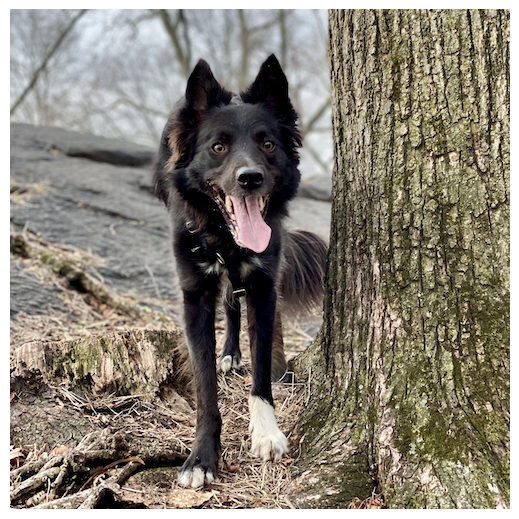

In [37]:
# Thanks for sticking till the end.

sns.dogplot()
plt.show()

# <center>**$THE$ $END$**